<a href="https://colab.research.google.com/github/monfortbrian/pytorch-flatPlanet/blob/master/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [66]:
#Create a model that inherit nn.module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # Output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our n.n Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward (self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [44]:
# Pick a manual seed for randomization
torch.manual_seed(32)

# Create an instance of the model
model = Model()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)


In [12]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
# Change last column from string to int
df['variety']=df['variety'].replace('Setosa', 0.0)
df['variety']=df['variety'].replace('Versicolor', 1.0)
df['variety']=df['variety'].replace('Virginica', 2.0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [24]:
# Train test split! Set X, y
X = df.drop('variety', axis=1)
y = df['variety']

In [25]:
# Convert these to numpy arrays
X= X.values
y= y.values

In [26]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
from sklearn.model_selection import train_test_split

In [45]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=32)

In [49]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [51]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [54]:
# Set the criterion of model to measure the error, how far of the prediction are from
criterion = nn.CrossEntropyLoss()
# Choose Adam opimizer, lr = learning rate (if error doesn't go down after a bunch of )
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


In [55]:
# Train our model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses =[]
for i in range (epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)
  # Measure the loss
  loss = criterion(y_pred, y_train)
  # Keep track of our losses
  losses.append(loss.detach().numpy())
  # Print every 10 epoch
  if i %10==0:
    print (f'Epoch: {i} and loss: {loss}')

  # Do some propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.5183648467063904
Epoch: 20 and loss: 0.13743536174297333
Epoch: 30 and loss: 0.1254139542579651
Epoch: 40 and loss: 0.07973220199346542
Epoch: 50 and loss: 0.06936183571815491
Epoch: 60 and loss: 0.06615691632032394
Epoch: 70 and loss: 0.062250085175037384
Epoch: 80 and loss: 0.059606004506349564
Epoch: 90 and loss: 0.057589612901210785


Text(0.5, 0, 'Epoch')

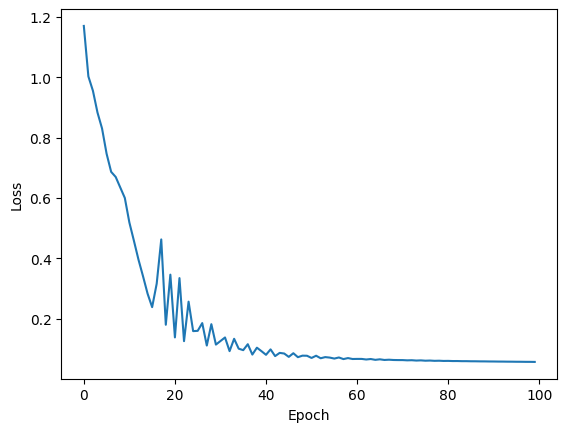

In [56]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [37]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [57]:
loss

tensor(0.0562, grad_fn=<NllLossBackward0>)

In [58]:
correct =0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}. {str(y_val)} \t {y_test[i]}')

    #Correct or not
    if y_val.argmax().item()== y_test[i]:
      correct+=1

print(f'We got {correct} out of {len(y_test)}')

1. tensor([-10.9325,   4.9479,  -0.1627]) 	 1
2. tensor([ 11.4174,   3.0371, -14.1089]) 	 0
3. tensor([ 11.1374,   2.9560, -13.7610]) 	 0
4. tensor([-12.0051,   5.2487,   0.0901]) 	 1
5. tensor([-22.2085,   4.5177,   7.0639]) 	 2
6. tensor([-24.8464,   5.5572,   7.3377]) 	 2
7. tensor([ 10.8981,   2.8868, -13.4637]) 	 0
8. tensor([ 11.0790,   2.9391, -13.6885]) 	 0
9. tensor([-10.2712,   5.1880,  -0.8759]) 	 1
10. tensor([ 11.5532,   3.0763, -14.2775]) 	 0
11. tensor([-12.4316,   5.4715,   0.1118]) 	 1
12. tensor([-28.0065,   3.9714,  11.1067]) 	 2
13. tensor([-6.3181,  4.2503, -2.2742]) 	 1
14. tensor([-5.2622,  4.6249, -3.6969]) 	 1
15. tensor([-23.9445,   4.3702,   8.2367]) 	 2
16. tensor([-27.8125,   3.4781,  11.6135]) 	 2
17. tensor([-12.6627,   4.7358,   1.1021]) 	 1
18. tensor([-21.1312,   4.4004,   6.5460]) 	 2
19. tensor([-6.3971,  4.5974, -2.7707]) 	 1
20. tensor([ 12.1420,   3.2467, -15.0090]) 	 0
21. tensor([ 11.5569,   3.0774, -14.2821]) 	 0
22. tensor([-29.0806,   4.7532,

In [59]:
new_iris = torch.tensor([5.6, 3.7, 2.2, 2.0])
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 0.9390,  3.5227, -6.7452])


In [61]:
newer_iris=  torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model.forward(newer_iris))

tensor([-21.4849,   4.2786,   6.8847])


In [62]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [63]:
# Load the saved model
new_model= Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [69]:
# Make sure it loaded correctly
new_model.eval()
print(new_model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)
